<a href="https://colab.research.google.com/github/JinGunseon/FinanceDataAnalysis/blob/main/%EC%8B%A4%EC%8A%B5_%EC%9D%B4%EB%8F%99_%ED%8F%89%EA%B7%A0%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EB%8B%A8%EC%88%9C_%EB%A7%A4%EB%A7%A4_%EC%A0%84%EB%9E%B5(Backtesting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Backtesting
- 과거 데이터를 활용하여, 해당 전략을 통해 수익을 얻을 수 있는지 검증
- 진짜 돈 깨져가면서 전략을 테스트하는 것이 아니라, 있는 데이터로 먼저 검증하라!

# 이동평균선을 이용한 Simple trading strategy

- 단기 이동평균선이 장기 이동평균선 위에 있을 때 매일 1주씩 매입
  - fast signal (단기 이동평균: MA10) 이 slow signal (장기 이동평균: MA50)위에 있으면 1 주 보유, 아래에 있으면 0 주 보유 전략  
- 종가에 매수, 매도 한다고 가정. 거래비용 없다고 가정.

- MA10 >= MA50 : 1 주 보유 (1주 매수(Long) or hold)
- MA10 < MA50 : 0 주 보유 (1주 매도(Short) or no action) (해외에서는 공매도가 가능하기 때문에 -1주 보유)

```
df['Share'] = [1 if df.loc[idx,'MA10'] > df.loc[idx, 'MA50'] else 0 for idx in df.index]
```

- Daily Profit 계산

- 누적 수익 계산


In [2]:
!pip install --upgrade finance-datareader
!pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 62.5 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.57
    Uninstalling yfinance-0.2.57:
      Successfully uninstalled yfinance-0.2.57


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import FinanceDataReader as fdr

short = 10
long = 50  # 100, 200

In [2]:
ms = fdr.DataReader("MSFT", start="20200101")  #Microsoft
ms.head()

,Open,High,Low,Close,Volume,Adj Close
2020-01-02,158.779999,160.729996,158.330002,160.619995,22622100,153.323257
2020-01-03,158.320007,159.949997,158.059998,158.619995,21116200,151.414124
2020-01-06,157.080002,159.100006,156.509995,159.029999,20813700,151.805511
2020-01-07,159.320007,159.669998,157.320007,157.580002,21634100,150.421371
2020-01-08,158.929993,160.800003,157.949997,160.089996,27746500,152.817337


In [3]:
ms.drop(['High', 'Low', 'Open', 'Volume', 'Close'], axis=1, inplace=True)
ms.head()

,Adj Close
2020-01-02,153.323257
2020-01-03,151.414124
2020-01-06,151.805511
2020-01-07,150.421371
2020-01-08,152.817337


In [8]:
# List Comprehension
sample = [1, 2, 3, 4, 5, 6, 7, 8]
[x for x in sample if x%2 == 0]

[2, 4, 6, 8]

In [13]:
[1 if ms.loc[day, 'MA_SHORT'] >= ms.loc[day, 'MA_LONG'] else 0 for day in ms.index]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [14]:
# 단기 및 장기 이동평균(MA_SHORT, MA_LONG) 계산
# 'Adj Close' 열을 기준으로 단기 이동평균(MA_SHORT)을 계산하고 데이터프레임에 추가합니다.
ms['MA_SHORT'] = ms['Adj Close'].rolling(short).mean()

# 'Adj Close' 열을 기준으로 장기 이동평균(MA_LONG)을 계산하고 데이터프레임에 추가합니다.
ms['MA_LONG'] = ms['Adj Close'].rolling(long).mean()

# 매매 신호(Shares)를 생성
# 각 날짜에 대해, 단기 이동평균(MA_SHORT)이 장기 이동평균(MA_LONG)보다 크거나 같으면 1(매수),
# 그렇지 않으면 0(매도)로 설정하여 'Shares' 열에 저장합니다.
ms['Shares'] = [1 if ms.loc[day, 'MA_SHORT'] >= ms.loc[day, 'MA_LONG']
                else 0 for day in ms.index]

ms

,Adj Close,MA_SHORT,MA_LONG,Shares
2020-01-02,153.323257,NaN,NaN,0
2020-01-03,151.414124,NaN,NaN,0
2020-01-06,151.805511,NaN,NaN,0
2020-01-07,150.421371,NaN,NaN,0
2020-01-08,152.817337,NaN,NaN,0
...,...,...,...,...
2025-04-28,391.160004,378.357001,386.801458,0
2025-04-29,394.040009,378.980002,386.530005,0
2025-04-30,395.260010,379.933002,386.258799,0
2025-05-01,425.399994,385.312003,386.487999,0


In [15]:
ms['Next Day Close'] = ms['Adj Close'].shift(-1)
ms.tail()

,Adj Close,MA_SHORT,MA_LONG,Shares,Next Day Close
2025-04-28,391.160004,378.357001,386.801458,0,394.040009
2025-04-29,394.040009,378.980002,386.530005,0,395.260010
2025-04-30,395.260010,379.933002,386.258799,0,425.399994
2025-05-01,425.399994,385.312003,386.487999,0,435.279999
2025-05-02,435.279999,392.062003,386.870999,1,NaN


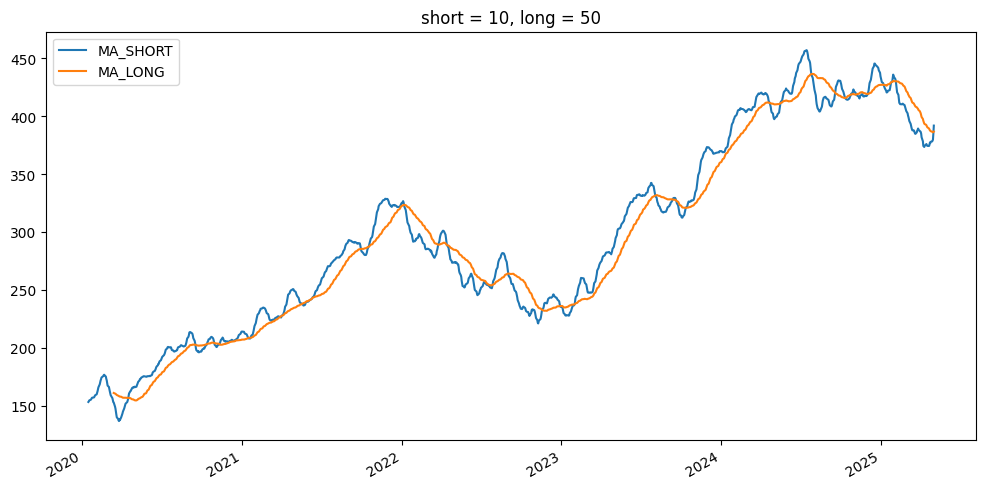

In [16]:
# 'MA_SHORT'와 'MA_LONG' 열을 시각화
# 단기 이동평균(MA_SHORT)과 장기 이동평균(MA_LONG)을 함께 플로팅합니다.
# 그래프 크기를 12x6으로 설정합니다.
ms[['MA_SHORT', 'MA_LONG']].plot(figsize=(12, 6))

# 그래프의 제목을 설정합니다. short와 long 변수 값을 제목에 포함시킵니다.
plt.title(f"short = {short}, long = {long}")

plt.show()

## Daily Profit
- 당일 보유 주식이 있으면 (익일 종가 - 당일 종가)를 수익으로 계산

```
df['Profit'] = [df.loc[idx, 'close1'] - df.loc[idx, 'close']
                if df['Share'] == 1 else 0 or idx in df.index]
```


In [18]:
ms['Profit'] = [ms.loc[day,'Next Day Close'] - ms.loc[day,'Adj Close'] if ms.loc[day,'Shares'] == 1 else 0 for day in ms.index]
ms.iloc[100:200]

,Adj Close,MA_SHORT,MA_LONG,Shares,Next Day Close,Profit
2020-05-27,174.509323,175.212624,161.889573,1,174.115768,-0.393555
2020-05-28,174.115768,175.418916,162.566015,1,175.891525,1.775757
2020-05-29,175.891525,175.728120,163.396087,1,175.488373,-0.403152
2020-06-01,175.488373,175.745274,164.173875,1,177.484863,1.996490
2020-06-02,177.484863,175.794568,165.094201,1,177.916794,0.431931
...,...,...,...,...,...,...
2020-10-09,207.644730,201.880449,203.131075,0,213.023270,0.000000
2020-10-12,213.023270,203.031195,203.455986,0,214.428055,0.000000
2020-10-13,214.428055,204.532175,203.587652,1,212.503723,-1.924332
2020-10-14,212.503723,205.545335,203.743221,1,211.349152,-1.154572


<Axes: >

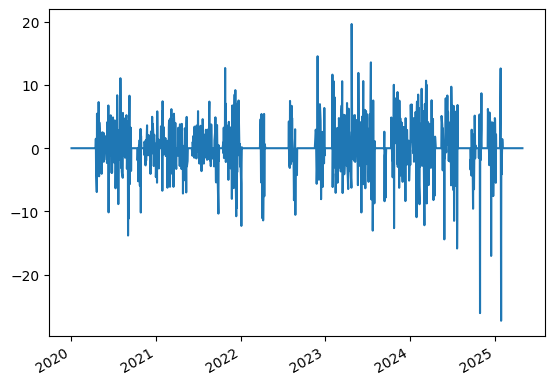

In [19]:
ms['Profit'].plot()

## 누적 수익

```
df['wealth'] = df['Profit'].cumsum()
```

In [21]:
ms['Wealth']= ms['Profit'].cumsum()
ms

,Adj Close,MA_SHORT,MA_LONG,Shares,Next Day Close,Profit,Wealth
2020-01-02,153.323257,NaN,NaN,0,151.414124,0.0,0.000000
2020-01-03,151.414124,NaN,NaN,0,151.805511,0.0,0.000000
2020-01-06,151.805511,NaN,NaN,0,150.421371,0.0,0.000000
2020-01-07,150.421371,NaN,NaN,0,152.817337,0.0,0.000000
2020-01-08,152.817337,NaN,NaN,0,154.726440,0.0,0.000000
...,...,...,...,...,...,...,...
2025-04-28,391.160004,378.357001,386.801458,0,394.040009,0.0,69.427261
2025-04-29,394.040009,378.980002,386.530005,0,395.260010,0.0,69.427261
2025-04-30,395.260010,379.933002,386.258799,0,425.399994,0.0,69.427261
2025-05-01,425.399994,385.312003,386.487999,0,435.279999,0.0,69.427261


<Axes: >

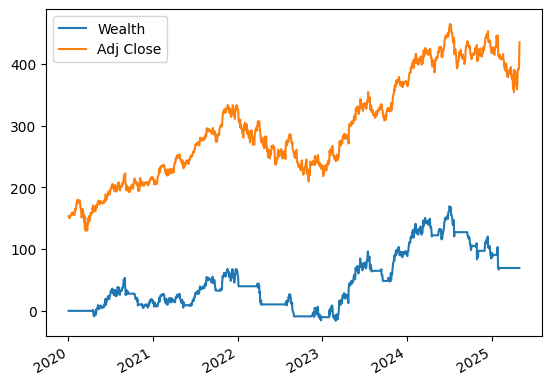

In [23]:
ms[['Wealth', 'Adj Close']].plot()

MA_SHORT >= MA_LONG : 1 주 보유 (매수 or hold), MA_SHORT < MA_LONG : 0 주 보유
이 전략으로 1948일 동안 1주 매매로 얻은 수익 : 69.43 


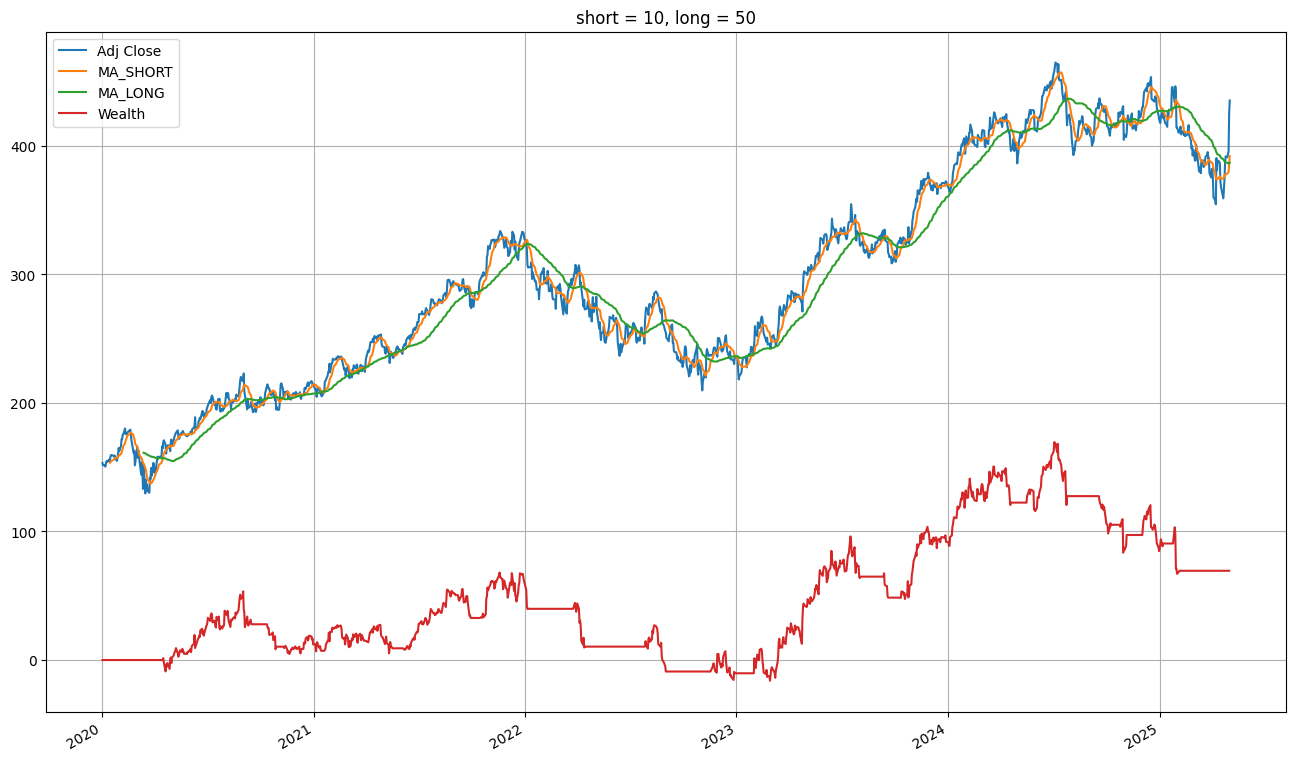

In [25]:
# 전체 기간 동안의 일수를 계산합니다.
n_days = len(pd.date_range(ms.index[0], ms.index[-1]))

# 매매 전략 설명
# MA_SHORT >= MA_LONG일 때는 1주 보유(매수 또는 홀드), MA_SHORT < MA_LONG일 때는 0주 보유(매도)를 의미합니다.
print('MA_SHORT >= MA_LONG : 1 주 보유 (매수 or hold), MA_SHORT < MA_LONG : 0 주 보유')

# 해당 전략으로 전체 기간 동안 얻은 수익을 출력합니다.
# ms.index[-2]는 마지막 날의 직전 날을 가리키며, 'wealth' 열의 값을 출력하여 수익을 확인합니다.
print(f"이 전략으로 {n_days}일 동안 1주 매매로 얻은 수익 : {ms.loc[ms.index[-2], 'Wealth']:.2f} ")

# 'Adj Close', 'MA_SHORT', 'MA_LONG', 'Wealth' 열을 함께 시각화
# 그래프 크기를 16x10으로 설정하고, 종가, 단기/장기 이동평균, 그리고 누적 자산 변화를 시각화합니다.
ms[['Adj Close', 'MA_SHORT', 'MA_LONG', 'Wealth']].plot(figsize=(16, 10))

# 그래프 제목을 설정합니다. short와 long 변수 값을 제목에 포함시킵니다.
plt.title(f"short = {short}, long = {long}")

plt.grid()
plt.show()